# Purification Circuit X for purifying Pauli X error


The goal is to purify the following imperfect entangled state:
$$\rho_A=F|\phi_{\pm}\rangle \langle \phi_{\pm}|+(1-F)  |\psi_{\pm}\rangle \langle \psi_{\pm}| $$\
First, preparing the initial imperfect entangled state as $\rho_A=F|\phi_{+}\rangle \langle \phi_{+}|+(1-F)  |\psi_{+}\rangle \langle \psi_{+}| $


C:\Users\Sajede Harraz\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


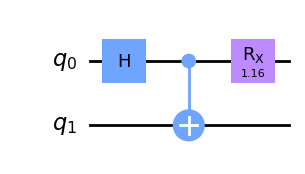

In [1]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, execute, Aer,transpile, assemble
from qiskit.quantum_info import Kraus, SuperOp, Operator, partial_trace, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.providers.aer.noise import amplitude_damping_error, pauli_error
from qiskit.quantum_info import DensityMatrix, partial_trace, Pauli
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np
import math
q = QuantumRegister(2, 'q')
qc = QuantumCircuit(q)
anc = QuantumRegister(1, 'ancilla') 
F = 0.7
Fth =2* math.acos(math.sqrt(F))
#####
qc.h(0)
qc.cx(0, 1)
qc.rx(Fth, 0)
#####
qc.draw('mpl')

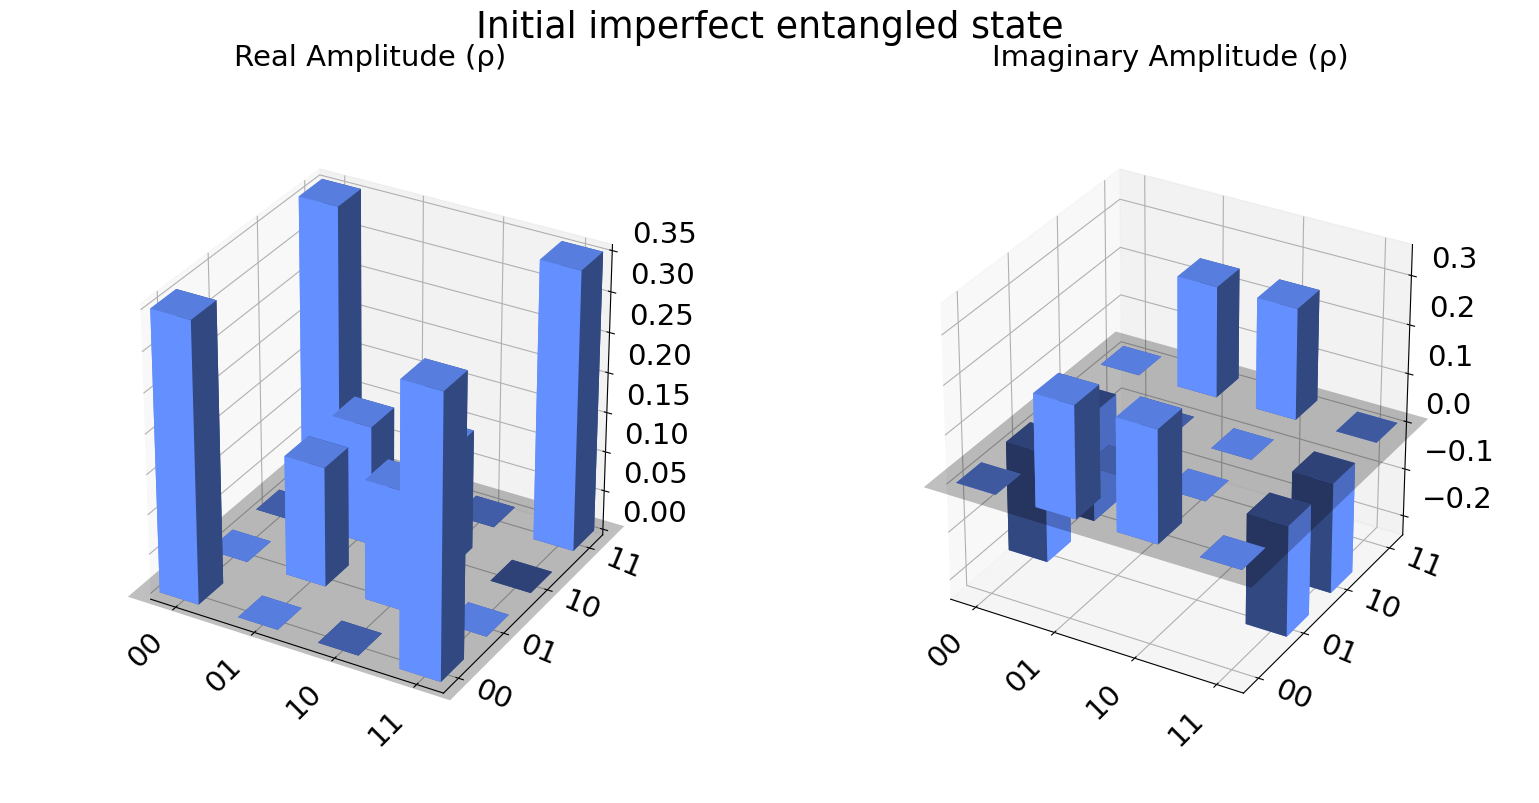

In [2]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
statevector = result.get_statevector()
plot_state_city(statevector, title='Initial imperfect entangled state')


Based on the real amplitude of the density matrix, we have prepared the initial imperfect entangled state with the X structure. We will now employ Purification Circuit X, which is detailed in the paper.

C:\Users\Sajede Harraz\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


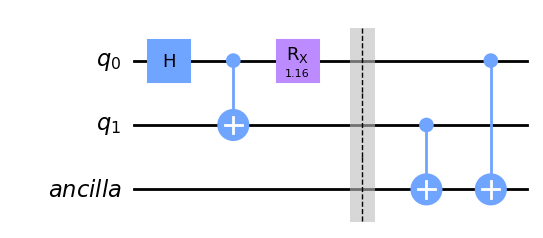

In [3]:
# Check if the "ancilla" register already exists
if not any(reg.name == 'ancilla' for reg in qc.qregs):
    qc.add_register(anc)
qc.barrier()
qc.cx(1, 2)
qc.cx(0, 2)

qc.draw('mpl')

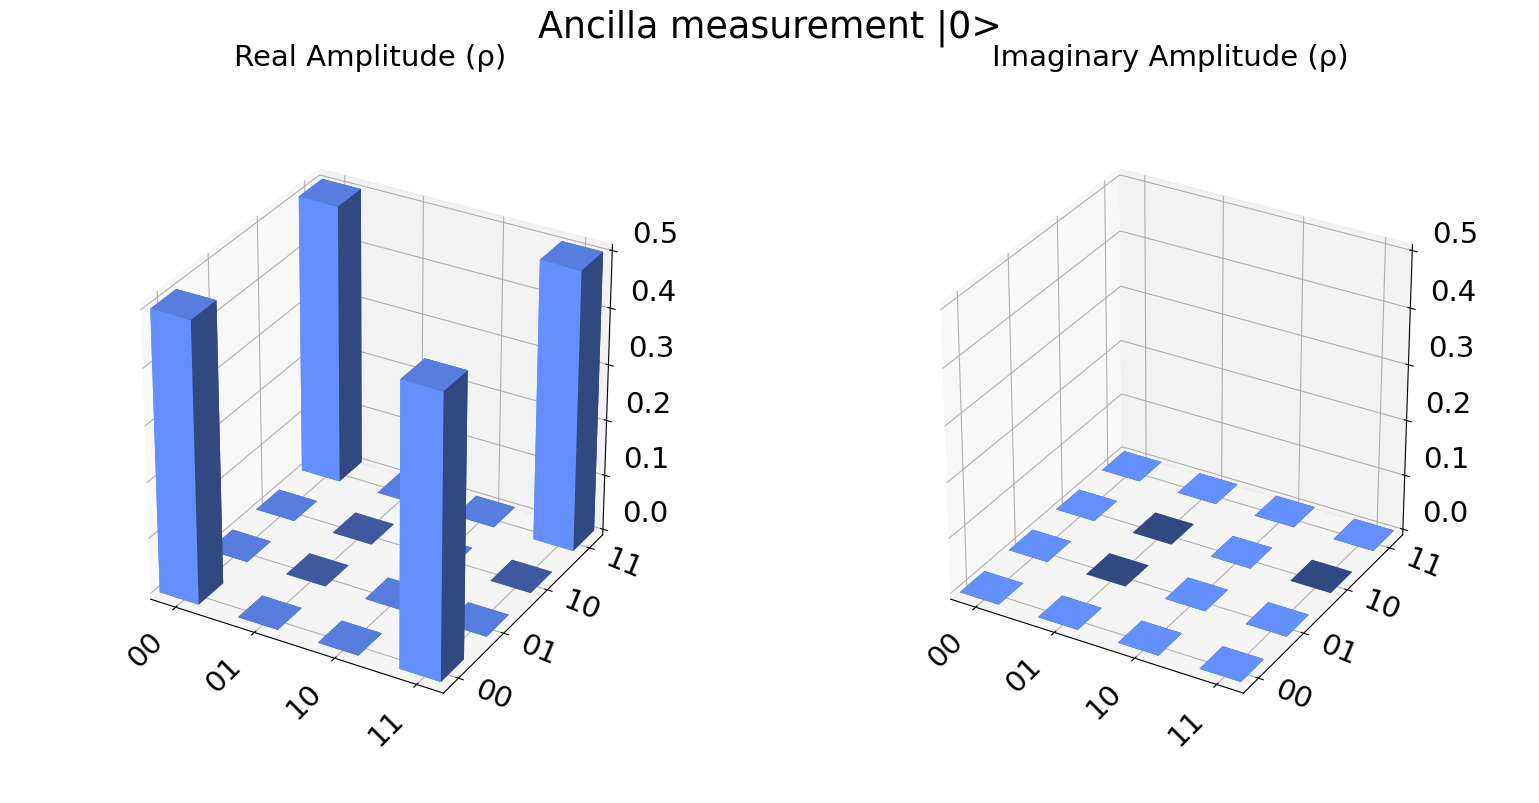

In [4]:
qc=qc.reverse_bits ()
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
statevector = result.get_statevector()

# Create the full density matrix
full_dm = DensityMatrix(statevector)

# Function to get the reduced density matrix when ancilla is 0
def get_reduced_dm_ancilla_0(full_dm):
    dims = full_dm.dims()
    m0 = np.array([
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])
    projector = DensityMatrix(m0)    
    projected_dm = DensityMatrix(projector.data @ full_dm.data) 
    reduced_dm = partial_trace(projected_dm, [0])
    # Normalize the reduced density matrix
    reduced_dm = reduced_dm / reduced_dm.trace()
    
    return reduced_dm
# Get the reduced density matrix
reduced_dm0 = get_reduced_dm_ancilla_0(full_dm)

plot_state_city(reduced_dm0, title='Ancilla measurement |0>')


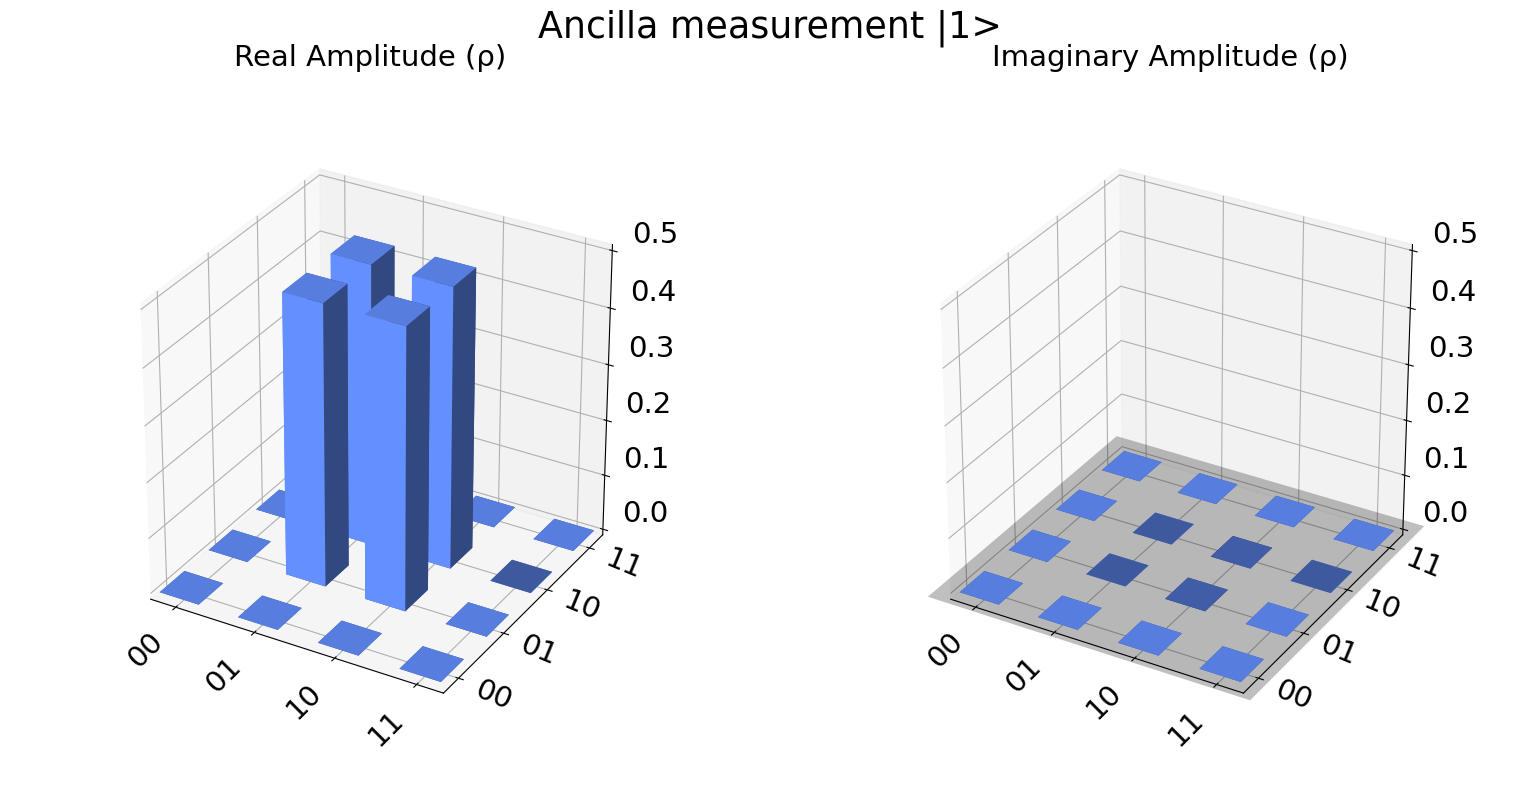

In [5]:
def get_reduced_dm_ancilla_1(full_dm):
    dims = full_dm.dims()
    m1 = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1]
    ]) 
    projector = DensityMatrix(m1)          
    projected_dm = DensityMatrix(projector.data @ full_dm.data)
    reduced_dm = partial_trace(projected_dm, [0])
    # Normalize the reduced density matrix
    reduced_dm1 = reduced_dm / reduced_dm.trace()    
    return reduced_dm1

# Get the reduced density matrix
reduced_dm = get_reduced_dm_ancilla_1(full_dm)

plot_state_city(reduced_dm, title='Ancilla measurement |1>')
